In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
base_file = "../merged_data/merged_all_data.csv"
base_df = pd.read_csv(base_file)
trans_df = base_df.transpose()
trans_df.columns = trans_df.iloc[1]
trans_df = trans_df.drop(trans_df.index[1])
trans_df = trans_df.drop(trans_df.index[0])

trans_df = trans_df.drop(["Employment_2001","Establishments_2001","Employment_2002","Establishments_2002",
                         "Employment_2003","Establishments_2003","Employment_2004","Establishments_2004",
                         "Employment_2005","Establishments_2005","Employment_2006","Establishments_2006",
                         "Employment_2008","Establishments_2008","Employment_2009","Establishments_2009",
                         "Employment_2010","Establishments_2010","Employment_2011","Establishments_2011",
                         "Employment_2012","Establishments_2012","Employment_2013","Establishments_2013",
                         "Employment_2014","Establishments_2014"])
trans_df

Description,Furniture and Home Furnishings Stores,Electronics and Appliance Stores,Grocery Stores,Clothing and Clothing Accessories Stores
Employment_2000,"549,184","407,321","2,716,868","1,368,665"
Establishments_2000,"64,842","45,592","98,275","150,946"
Employment_2007,"596,538","500,780","2,564,533","1,648,157"
Establishments_2007,"65,485","52,470","92,315","155,371"
Employment_2015,"445,240","407,409","2,800,048","1,711,022"
Establishments_2015,"50,336","46,731","95,514","146,694"


In [4]:
trans_df=trans_df.rename(columns= {'Furniture and Home Furnishings Stores': 'furniture',
                                     'Electronics and Appliance Stores':'electronics',
                                     'Grocery Stores':'grocery','Clothing and Clothing Accessories Stores':'clothing'}) 

trans_df

Description,furniture,electronics,grocery,clothing
Employment_2000,"549,184","407,321","2,716,868","1,368,665"
Establishments_2000,"64,842","45,592","98,275","150,946"
Employment_2007,"596,538","500,780","2,564,533","1,648,157"
Establishments_2007,"65,485","52,470","92,315","155,371"
Employment_2015,"445,240","407,409","2,800,048","1,711,022"
Establishments_2015,"50,336","46,731","95,514","146,694"


In [6]:
trans_df.grocery = pd.to_numeric(trans_df.grocery.str.replace(',',''), errors = 'coerce')
trans_df.electronics = pd.to_numeric(trans_df.electronics.str.replace(',',''), errors = 'coerce')
trans_df.furniture = pd.to_numeric(trans_df.furniture.str.replace(',',''), errors = 'coerce')
trans_df.clothing = pd.to_numeric(trans_df.clothing.str.replace(',',''), errors = 'coerce')
trans_df

Description,furniture,electronics,grocery,clothing
Employment_2000,549184,407321,2716868,1368665
Establishments_2000,64842,45592,98275,150946
Employment_2007,596538,500780,2564533,1648157
Establishments_2007,65485,52470,92315,155371
Employment_2015,445240,407409,2800048,1711022
Establishments_2015,50336,46731,95514,146694


In [12]:
reverse_df = trans_df.transpose()
reverse_df

,Employment_2000,Establishments_2000,Employment_2007,Establishments_2007,Employment_2015,Establishments_2015
Description,,,,,,
furniture,549184,64842,596538,65485,445240,50336
electronics,407321,45592,500780,52470,407409,46731
grocery,2716868,98275,2564533,92315,2800048,95514
clothing,1368665,150946,1648157,155371,1711022,146694
new,1,2,3,4,5,6


In [13]:
df1 = reverse_df.iloc[0]
df2 = reverse_df.iloc[1]
df3 = reverse_df.iloc[2]
df4 = reverse_df.iloc[3]
df1

Employment_2000        549184
Establishments_2000     64842
Employment_2007        596538
Establishments_2007     65485
Employment_2015        445240
Establishments_2015     50336
Name: furniture, dtype: int64

In [48]:
values = trans_df["furniture"]
numbers = []
for x in range(len(values)):
    y=values[x]
    numbers.append(y)

    
labels = []
for x in range(len(tick_labels)):
    y=tick_labels[x]
    labels.append(y)


<BarContainer object of 6 artists>

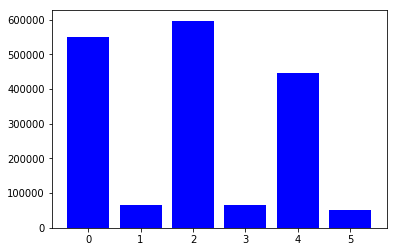

In [52]:
tick_labels = reverse_df.columns

x_axis = np.arange(len(numbers))

plt.bar(x_axis, numbers, color="b", align="center")

# plt.set_xticklabels(reverse_df.index,rotation=90)

([<matplotlib.axis.XTick at 0x1fae9f35978>,
 <a list of 6 Text xticklabel objects>)

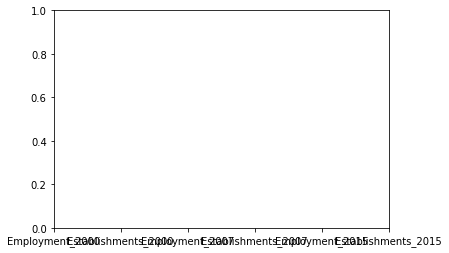

In [53]:
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, tick_labels)

In [8]:
trans_df['new']=[1,2,3,4,5,6]
trans_df

Description,furniture,electronics,grocery,clothing,new
Employment_2000,549184,407321,2716868,1368665,1
Establishments_2000,64842,45592,98275,150946,2
Employment_2007,596538,500780,2564533,1648157,3
Establishments_2007,65485,52470,92315,155371,4
Employment_2015,445240,407409,2800048,1711022,5
Establishments_2015,50336,46731,95514,146694,6


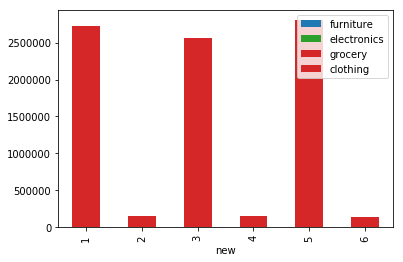

In [9]:
ax = trans_df.plot(x="new", y="furniture", kind="bar")
trans_df.plot(x="new", y="electronics", kind="bar", ax=ax, color="C2")
trans_df.plot(x="new", y="grocery", kind="bar", ax=ax, color="C3")
trans_df.plot(x="new", y="clothing", kind="bar", ax=ax, color="C3")

plt.show()

In [10]:
trans_df.pivot(index='Description', columns='new', values=['furniture','electronics','grocery','clothing']).plot(kind='bar')

KeyError: 'Description'

In [5]:
# df.pivot(index='channel', columns='ab', values='booked').plot(kind='bar')

df1 = reverse_df.iloc[0]
df2 = reverse_df.iloc[1]
df3 = reverse_df.iloc[2]
df4 = reverse_df.iloc[3]
df1

Employment_2000        549,184
Establishments_2000     64,842
Employment_2007        596,538
Establishments_2007     65,485
Employment_2015        445,240
Establishments_2015     50,336
Name: furniture, dtype: object

In [8]:
fig = plt.figure()

for frame in [df1, df2, df3]:
    plt.plot(frame['furniture'], frame['electronics'])
#     plt.plot(kind='bar')

# plt.xlim(0,18000)
# plt.ylim(0,30)
plt.show()

KeyError: 'furniture'

<Figure size 432x288 with 0 Axes>

In [ ]:
df1= df1.reset_index()
df1

In [ ]:
df1=df1.rename(columns= {"index":"years"})

In [ ]:
df1.reset_index(drop=True, inplace=True)


In [ ]:
df1

In [ ]:
df1.pivot(index='years', columns=None, values=['furniture', 'electronics','grocery','clothing']).plot(kind='bar')

In [ ]:
ax = df1[['furniture', 'electronics', 'grocery', 'clothing']].plot(kind='bar',figsize=(15,10), fontsize=12)
# ax = df1.plot(kind='bar')
# ax= df2.plot(kind="bar")